# This is a sample Jupyter Notebook

Below is an example of a code cell. 
Put your cursor into the cell and press Shift+Enter to execute it and select the next one, or click 'Run Cell' button.

Press Double Shift to search everywhere for classes, files, tool windows, actions, and settings.

To learn more about Jupyter Notebooks in PyCharm, see [help](https://www.jetbrains.com/help/pycharm/ipython-notebook-support.html).
For an overview of PyCharm, go to Help -> Learn IDE features or refer to [our documentation](https://www.jetbrains.com/help/pycharm/getting-started.html).

In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [5]:
student = pd.read_csv("student_data.csv")
student.head()



,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


In [6]:
# Check the first few rows and data types
print(student.head())
print(student.dtypes)

   StudentID  Age  Gender  Ethnicity  ParentalEducation  StudyTimeWeekly  \
0       1001   17       1          0                  2        19.833723   
1       1002   18       0          0                  1        15.408756   
2       1003   15       0          2                  3         4.210570   
3       1004   17       1          0                  3        10.028829   
4       1005   17       1          0                  2         4.672495   

   Absences  Tutoring  ParentalSupport  Extracurricular  Sports  Music  \
0         7         1                2                0       0      1   
1         0         0                1                0       0      0   
2        26         0                2                0       0      0   
3        14         0                3                1       0      0   
4        17         1                3                0       0      0   

   Volunteering       GPA  GradeClass  
0             0  2.929196         2.0  
1             0  3

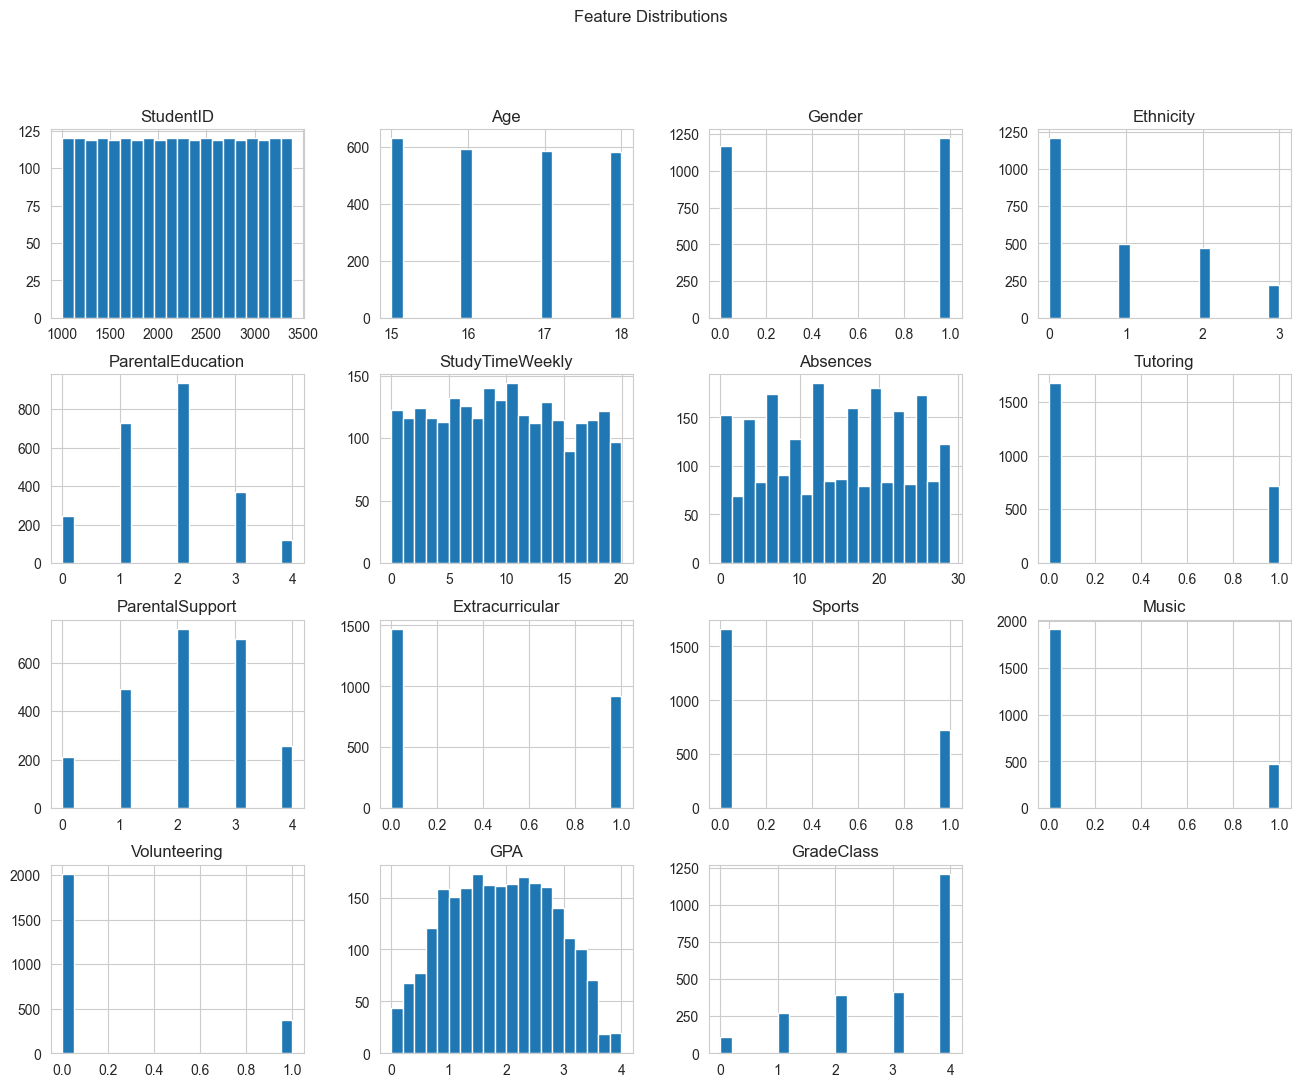

In [7]:
### 2. Feature Distribution
import matplotlib.pyplot as plt
# Histogram for numeric features
student.select_dtypes(include=['float64', 'int64']).hist(figsize=(16, 12), bins=20)
plt.suptitle('Feature Distributions')
plt.show()

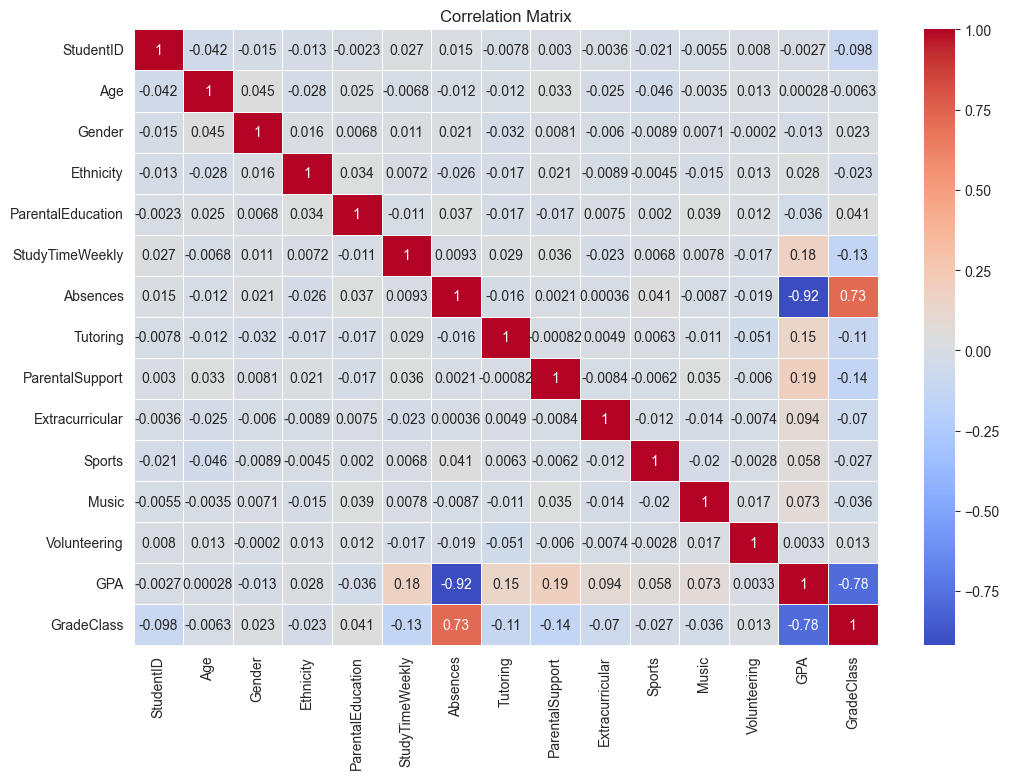

In [8]:
# Correlation matrix for numeric features
import seaborn as sns
plt.figure(figsize=(12, 8))
corr_matrix = student.select_dtypes(include=['float64', 'int64']).corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [9]:
#split dataset in features and target variable
feature_cols = ['StudentID','Age','Gender','Ethnicity','ParentalEducation','StudyTimeWeekly','Absences','Tutoring','ParentalSupport','Extracurricular','Sports','Music','Volunteering','GPA']
X = student[feature_cols] # Features
y = student.GradeClass # Target variable


In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test


In [11]:
# Create Decision Tree classifer object

clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)



# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))



Accuracy: 0.9289693593314763


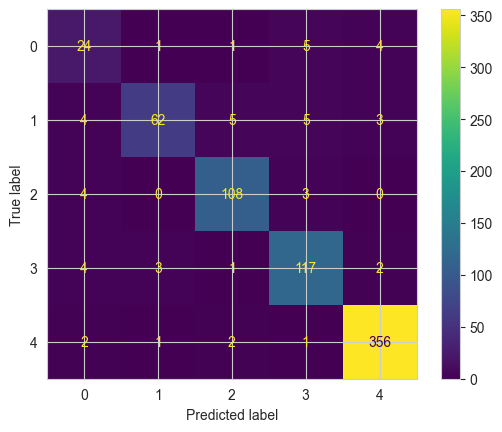

In [12]:
# Importing necessary libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Assuming clf is your trained classifier and X_test, y_test are the test data
y_pred = clf.predict(X_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Show the plot
plt.show()


In [13]:
print(clf.classes_)


[0. 1. 2. 3. 4.]


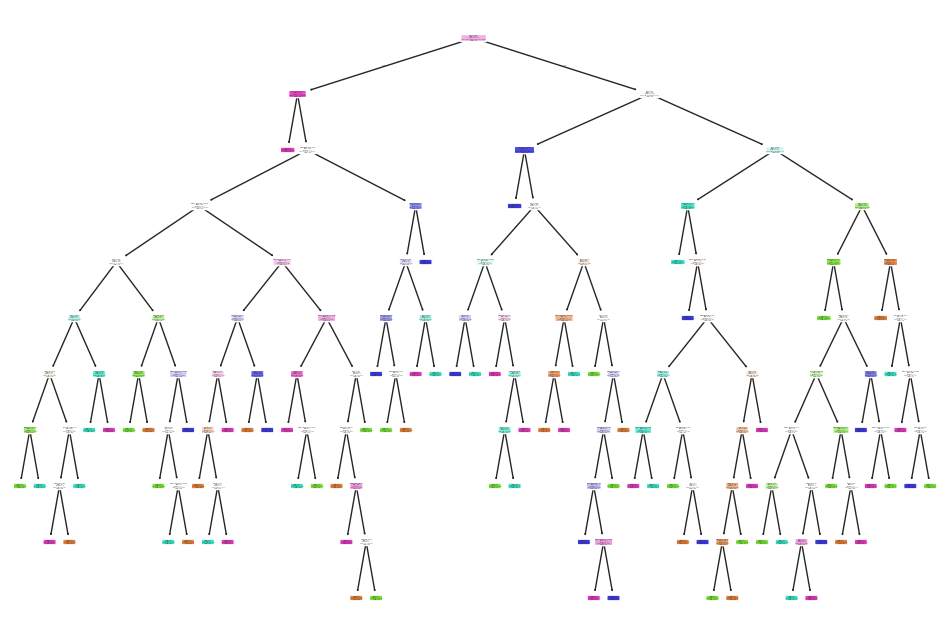

In [14]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the decision tree using matplotlib
plt.figure(figsize=(12,8))  # Adjust size as necessary
tree.plot_tree(clf, 
               feature_names=feature_cols, 
               class_names=['0.0', '1.0', '2.0', '3.0', '4.0'], 
               filled=True, rounded=True)
plt.savefig('students.png')  # Save the plot as a PNG file
plt.show()


In [15]:
# optimizing Decision Tree Performance 

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8997214484679665


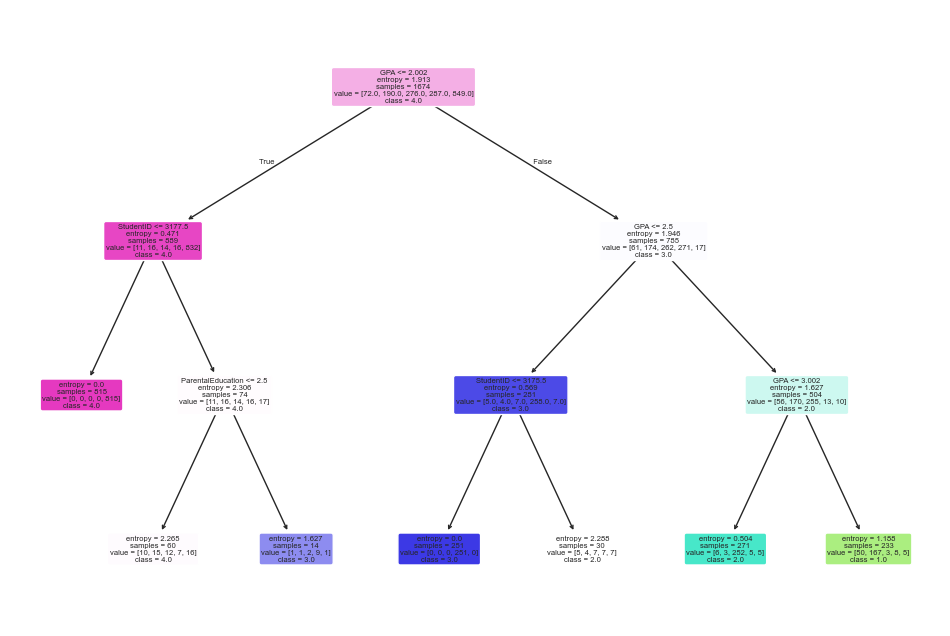

In [16]:
# visualizing Decision Trees 
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the decision tree using matplotlib
plt.figure(figsize=(12,8))  # Adjust size as necessary
tree.plot_tree(clf, 
               feature_names=feature_cols, 
               class_names=['0.0', '1.0', '2.0', '3.0', '4.0'], 
               filled=True, rounded=True)
plt.savefig('students1.png')  # Save the plot as a PNG file
plt.show()
